#ML4Net - Lab 3

## Team members

Alba Yerga (252197) | Marc Sirvent (240198)

## Description

In this lab, you will train a time series forecaster using Federated Learning (FL).

The dataset you are going to use contains data from multiple APs. In particular, each AP's dataset contains the following features:

* `datetime` is the timestamp (date) at which the measurement was taken
* `Bytes` is the number of Bytes contributed at the corresponding datetime
* `Active Connections` is the number of active connections (users connected to the AP) at the corresponding datetime
* `Active Users` is the number of active users at the corresponding datetime
* `AP ID` is the ID of the AP where the measurement was taken

Original dataset: Chen, W., Lyu, F., Wu, F., Yang, P., & Ren, J. (2021). Flag: Flexible, accurate, and long-time user load prediction in large-scale WiFi system using deep RNN. IEEE Internet of Things Journal, 8(22), 16510-16521.

## Instructions

*   Follow the steps from this Notebook and complete the proposed exercises.
*   Deliver the completed Notebook by uploading it to your Github repository.
*   **Submission deadline: 8 June 2025 (EoB).**

## Setting up the environment

1. Connect your Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Download the dataset

In [ ]:
# !wget https://github.com/fwilhelmi/fwilhelmi.github.io/blob/master/files/datasetLab3.pkl

3. Define the main path of the code

In [2]:
mypath='/content/drive/Shareddrives/LAB3-ML'

4. Extract the source code to the destination folder

In [ ]:
#mkdir $mypath; cp datasetLab3.pkl $mypath; cd $mypath;

## Loading the data




Load the data from the pickle file (https://docs.python.org/3/library/pickle.html) that contains the dataset.

**Important:** If you have issues with the dataset after automatically downloading and extracting it, download it and move it manually to the indicated folder.

In [3]:
cd $mypath

/content/drive/Shareddrives/LAB3-ML


In [4]:
import pickle
import os

print(os.getcwd())
print(os.path.exists('datasetLab3.pkl'))

# Open and load the pickle file
try:
    with open('datasetLab3.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    print("Data loaded successfully:")
    print(loaded_data)
except FileNotFoundError:
    print("Error: 'datasetLab3.pkl' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

/content/drive/Shareddrives/LAB3-ML
True
Data loaded successfully:
                     Bytes  Active Connections  Active Users   AP ID
datetime                                                            
2019-04-30 07:10:00    0.0            0.075209           0.0  7-1012
2019-04-30 07:20:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:30:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:40:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:50:00    0.0            0.000000           0.0  7-1012
...                    ...                 ...           ...     ...
2019-05-14 07:10:00    0.0            0.000000           0.0   7-104
2019-05-14 07:20:00    0.0            0.000000           0.0   7-104
2019-05-14 07:30:00    0.0            0.000000           0.0   7-104
2019-05-14 07:40:00    0.0            0.000000           0.0   7-104
2019-05-14 07:50:00    0.0            0.034091           0.0   7-104

[211064 rows x 4 columns]


## EXERCISES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

### Exercise 1:

Analyze the data from the different APs and discuss their properites (stationarity, trends, seasonality).

Select 2 or 3 key APs showing different properties and generate:

* Line plots (to plot the load vs the time)
* Autocorrelation plots (to show the relationship between past and future samples of the load)
* An Augmented Dickey-Fuller test (to study the stationarity of the AP)



In [6]:
# Visualizar unique AP IDs y seleccionar 3
df = pd.read_pickle("datasetLab3.pkl")
print(f"AP IDS: {df['AP ID'].unique()}")
print(f"\nNumber of distinct APs: {df['AP ID'].nunique()}") # 100 Unique AP IDs

AP IDS: ['7-1012' '7-1013' '7-1021' '7-1043' '7-1019' '7-1071' '7-1113' '7-1048'
 '7-1101' '7-1026' '7-1129' '7-112' '7-100' '7-111' '7-1030' '7-1117'
 '7-1126' '7-1099' '7-1052' '7-1087' '7-108' '7-1022' '7-1018' '7-1059'
 '7-1054' '7-110' '7-1058' '7-1094' '7-1064' '7-102' '7-1044' '7-1002'
 '7-1096' '7-1014' '7-1082' '7-1088' '7-1106' '7-1063' '7-1114' '7-1137'
 '7-1004' '7-1045' '7-1125' '7-1036' '7-1124' '7-1034' '7-1083' '7-1072'
 '7-1033' '7-1069' '7-1127' '7-1005' '7-1130' '7-1047' '7-1020' '7-1066'
 '7-1039' '7-1134' '7-1003' '7-1120' '7-1131' '7-1009' '7-1084' '7-1074'
 '7-1062' '7-1025' '7-1089' '7-1098' '7-1006' '7-1139' '7-10' '7-1133'
 '7-1060' '7-1032' '7-106' '7-1057' '7-101' '7-1102' '7-1085' '7-1053'
 '7-107' '7-1121' '7-1023' '7-1097' '7-1050' '7-1037' '7-11' '7-1136'
 '7-1040' '7-1015' '7-1079' '7-1065' '7-1104' '7-105' '7-103' '7-1100'
 '7-1056' '7-1051' '7-114' '7-104']

Number of distinct APs: 100


In [7]:
stats = df.groupby('AP ID')['Bytes'].agg(['mean', 'std', 'count']).sort_values(by='mean', ascending=False)
print(stats.head(3))  # APs con más carga promedio
print(stats.tail(3))  # APs con menos carga promedio

                 mean            std  count
AP ID                                      
7-1057  578626.555555  452638.668908   2361
7-1026  256028.089015  268157.535635   2163
7-1048  160233.110638  360763.251947   2118
             mean         std  count
AP ID                               
7-1065  11.502331  256.093387   2026
7-1133   0.684827   11.699623   2089
7-1043   0.000000    0.000000   1903


In [8]:
selected_aps = ['7-1057', '7-1065'] # seleccionar 2 AP

In [9]:
# Line plot function
def line_plot (df, ap):
  subset = df[df['AP ID'] == ap].sort_values(by='datetime') # filtrar registros con AP = ap
  plt.figure(figsize=(12, 4))
  plt.plot(subset.index, subset['Bytes'], label='Bytes') # datetime is the index
  plt.title(f'Line Plot - Bytes vs Time for AP {ap}')
  plt.xlabel('Datetime')
  plt.ylabel('Bytes')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

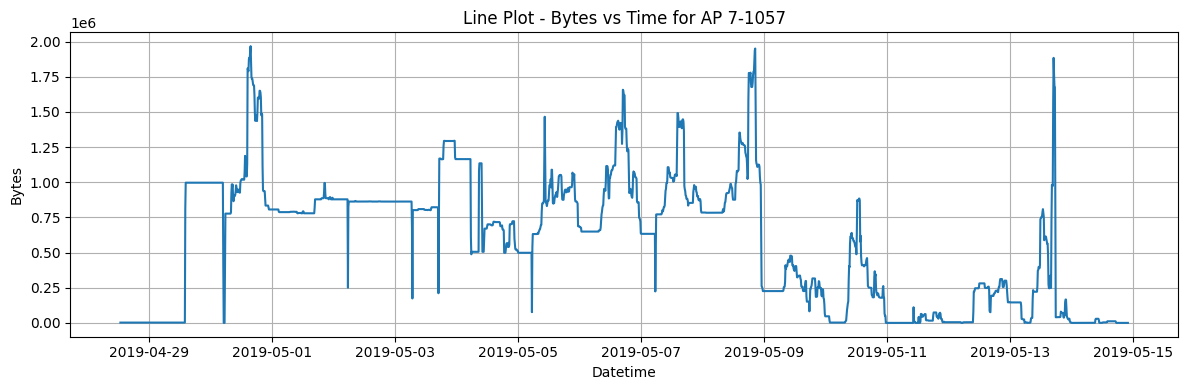

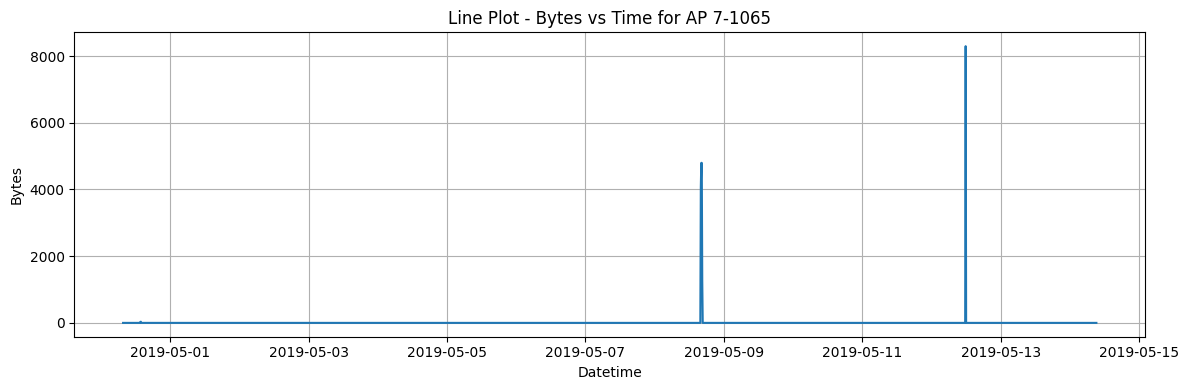

In [10]:
# Line plots
for ap in selected_aps:
  line_plot(df, ap)

In [11]:
# Autocorrelation plot function
def autocorrelation_plot(df, ap):
    subset = df[df['AP ID'] == ap].sort_index()
    plot_acf(subset['Bytes'].dropna(), lags=50)  # lags = número de desplazamientos que quieres mostrar
    plt.title(f'Autocorrelation Plot - Bytes for AP {ap}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

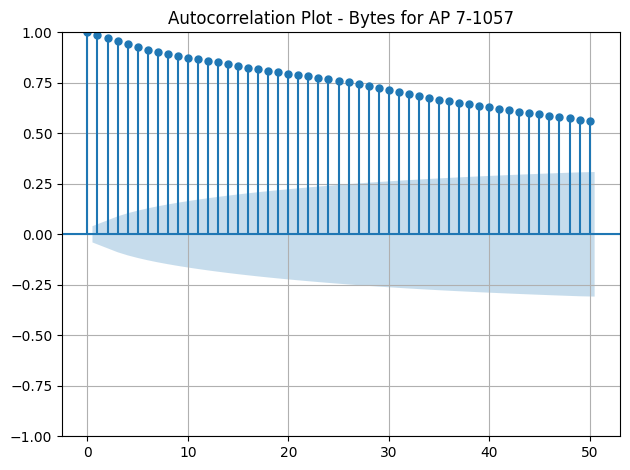

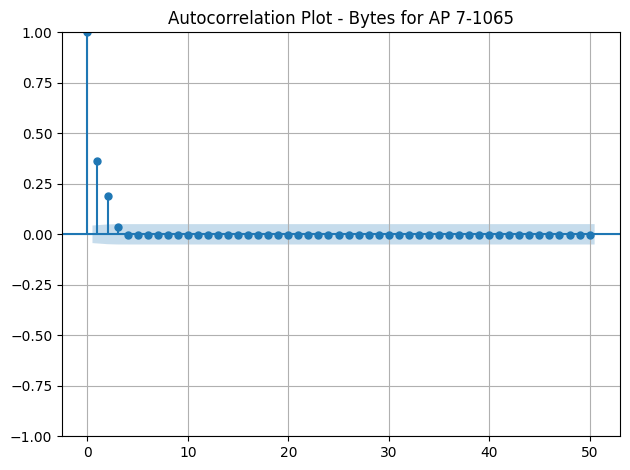

In [12]:
for ap in selected_aps:
  autocorrelation_plot(df, ap)

In [13]:
# Augmented Dickey-Fuller test
def run_adf_test(series, ap_id):
    print(f"ADF Test for AP {ap_id}")

    result = adfuller(series.dropna())
    labels = ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations']

    for value, label in zip(result[:4], labels):
        print(f"{label}: {value}")

    if result[1] < 0.05:
        print("The series is likely stationary (reject H₀)")
    else:
        print("The series is likely NOT stationary (fail to reject H₀)")

    print('-' * 50)

In [14]:
run_adf_test(df[df['AP ID'] == '7-1057']['Bytes'], '7-1057')
run_adf_test(df[df['AP ID'] == '7-1065']['Bytes'], '7-1065')

ADF Test for AP 7-1057
ADF Statistic: -3.298216805649605
p-value: 0.014958371736076047
# Lags Used: 9
Number of Observations: 2351
The series is likely stationary (reject H₀)
--------------------------------------------------
ADF Test for AP 7-1065
ADF Statistic: -22.265150898602148
p-value: 0.0
# Lags Used: 2
Number of Observations: 2023
The series is likely stationary (reject H₀)
--------------------------------------------------


Comentario sobre las propiedades:
### AP 7-1057:
- **Line Plot:** Parece haber una tendencia general hacia menor actividad después del 9 de mayo, aunque con interrupciones.
- **Autocorrelation:** La autocorrelación es alta y decreciente suavemente.
- **ADF Test:** La serie es estacionaria, aunque marginalmente.

### AP 7-1065:
- **Line Plot:** No hay evidencia clara de una tendencia. Muestra muy poca actividad, solo dos cargas altas puntuales.
- **Autocorrelation:** Casi nula tras lag 2.
- **ADF Test:** Fuerte evidencia de estacionalidad, aunque probablemente falsa y debida a los picos esporádicos sobre un fondo plano.

### Exercise 2:

Prepare the data to be presented as a time series to the ML model. For that, you will have to split features from samples by differentiating between an observation window (e.g., 10 samples) and a prediction window (e.g., 2 samples). Use a sliding window to iterate over all the samples.

Example: For an array [0,1,2,3,4,5], using an observation window $T_o$ = 3 and a prediction window $T_p$ = 1 would lead to the following time series data:
* $x_1$ = [0,1,2], $y_1$ = [3]
* $x_2$ = [1,2,3], $x_2$ = [4]
* $x_3$ = [2,3,4], $y_3$ = [5]

(where x are the features and y the labels)

In [15]:
# (response to exercise 2)

def create_time_series_dataset(df, observation_window=10, prediction_window=2, features=['Bytes', 'Active Connections', 'Active Users']):

    time_series_data = {}
    all_X = []
    all_y = []

    unique_aps = df['AP ID'].unique()

    for ap_id in unique_aps:
        # Filter and sort data for specific AP
        ap_data = df[df['AP ID'] == ap_id].sort_values('datetime').reset_index(drop=True)

        # Extract feature columns
        feature_data = ap_data[features].values
        target_data = ap_data['Bytes'].values  # Only predict Bytes

        X, y = [], []

        # Create sliding windows
        for i in range(len(feature_data) - observation_window - prediction_window + 1):
            # Features: observation window with all features
            x_window = feature_data[i:i + observation_window]

            # Labels: prediction window for Bytes only
            y_window = target_data[i + observation_window:i + observation_window + prediction_window]

            X.append(x_window)
            y.append(y_window)

        if len(X) > 0:  # Only add if there's data
            X = np.array(X)
            y = np.array(y)

            time_series_data[ap_id] = {'X': X, 'y': y}
            all_X.append(X)
            all_y.append(y)

    # Combine all data
    if all_X:
        combined_X = np.vstack(all_X)
        combined_y = np.vstack(all_y)
    else:
        combined_X = np.array([])
        combined_y = np.array([])

    return time_series_data, combined_X, combined_y

# Create time series data for all APs
time_series_data, all_X, all_y = create_time_series_dataset(df)

print(f"Time series data created for {len(time_series_data)} APs")
print(f"Combined features shape: {all_X.shape}")
print(f"Combined labels shape: {all_y.shape}")
print(f"Features per sample: {all_X.shape[2]} (Bytes, Active Connections, Active Users)")

Time series data created for 100 APs
Combined features shape: (209964, 10, 3)
Combined labels shape: (209964, 2)
Features per sample: 3 (Bytes, Active Connections, Active Users)


### Exercise 3:

Split the time series data into train, test, and validation, based on your criteria.

In [16]:
# (response to exercise 3)
def split_time_series_data(time_series_data, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):

    split_data = {}
    all_X_train, all_y_train = [], []
    all_X_val, all_y_val = [], []
    all_X_test, all_y_test = [], []

    for ap_id, ap_data in time_series_data.items():
        X = ap_data['X']
        y = ap_data['y']

        # Calculate split indices
        n_samples = len(X)
        train_end = int(n_samples * train_ratio)
        val_end = train_end + int(n_samples * val_ratio)

        # Split the data
        X_train, y_train = X[:train_end], y[:train_end]
        X_val, y_val = X[train_end:val_end], y[train_end:val_end]
        X_test, y_test = X[val_end:], y[val_end:]

        # Store split data for this AP
        split_data[ap_id] = {
            'train': {'X': X_train, 'y': y_train},
            'val': {'X': X_val, 'y': y_val},
            'test': {'X': X_test, 'y': y_test}
        }

        # Append to combined datasets
        all_X_train.append(X_train)
        all_y_train.append(y_train)
        all_X_val.append(X_val)
        all_y_val.append(y_val)
        all_X_test.append(X_test)
        all_y_test.append(y_test)

    # Combine datasets from all APs
    combined_data = {
        'train': {
            'X': np.vstack(all_X_train) if all_X_train else np.array([]),
            'y': np.vstack(all_y_train) if all_y_train else np.array([])
        },
        'val': {
            'X': np.vstack(all_X_val) if all_X_val else np.array([]),
            'y': np.vstack(all_y_val) if all_y_val else np.array([])
        },
        'test': {
            'X': np.vstack(all_X_test) if all_X_test else np.array([]),
            'y': np.vstack(all_y_test) if all_y_test else np.array([])
        }
    }

    return split_data, combined_data

# Split the time series data
ap_split_data, combined_split_data = split_time_series_data(time_series_data)

print(f"Number of APs: {len(ap_split_data)}")
print("\nCombined dataset sizes:")
print(f"Train: {combined_split_data['train']['X'].shape}")
print(f"Validation: {combined_split_data['val']['X'].shape}")
print(f"Test: {combined_split_data['test']['X'].shape}")


Number of APs: 100

Combined dataset sizes:
Train: (146927, 10, 3)
Validation: (31446, 10, 3)
Test: (31591, 10, 3)


### Exercise 4:
Define a model (e.g., GRU, LSTM, CNN, Transformer) able to receive the time series the data you generated in the previous exercise.

In [17]:
# (response to exercise 4)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def create_lstm_model(observation_window=10, features=3, prediction_window=2):
    """
    Creates a simple LSTM model for time series forecasting

    Parameters:
    - observation_window: number of time steps in input sequence
    - features: number of features per time step
    - prediction_window: number of time steps to predict

    Returns:
    - A compiled Keras model
    """

    model = Sequential([
        # LSTM layer with 64 units
        LSTM(64, activation='relu', input_shape=(observation_window, features),
             return_sequences=False),

        # Dropout for regularization
        Dropout(0.2),

        # Output layer
        Dense(prediction_window)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

# Create model instance
model = create_lstm_model()

# Display model summary
model.summary()


history = model.fit(
     combined_split_data['train']['X'],
     combined_split_data['train']['y'],
     validation_data=(combined_split_data['val']['X'], combined_split_data['val']['y']),
     epochs=20,
     batch_size=32
 )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,538 (68.51 KB)

 Trainable params: 17,538 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4592/4592 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - loss: 8108617216.0000 - mae: 20216.6328 - val_loss: 2349304320.0000 - val_mae: 10453.4482
Epoch 2/20
4592/4592 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - loss: 4828081664.0000 - mae: 14734.2373 - val_loss: 2052178432.0000 - val_mae: 8411.1162
Epoch 3/20
4592/4592 ━━━━━━━━━━━━━━━━━━━━ 93s 12ms/step - loss: 4798215680.0000 - mae: 15538.8984 - val_loss: 2414831104.0000 - val_mae: 9552.9199
Epoch 4/20
4592/4592 ━━━━━━━━━━━━━━━━━━━━ 70s 9ms/step - loss: 4737715200.0000 - mae: 14119.2393 - val_loss: 2008520192.0000 - val_mae: 8817.0264
Epoch 5/20
4592/4592 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - loss: 4037217024.0000 - mae: 13489.4834 - val_loss: 2255095040.0000 - val_mae: 9836.8525
Epoch 6/20
4592/4592 ━━━━━━━━━━━━━━━━━━━━ 83s 9ms/step - loss: 4802080256.0000 - mae: 14894.3496 - val_loss: 2206430976.0000 - val_mae: 9636.0127
Epoch 7/20
4592/4592 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - loss: 4306147840.0000 - mae: 14043.9688 - val_loss: 1912071296.00

### Exercise 5:

Train your model following two approaches:
1. **Centralized model training:** Mix data from multiple APs to train the model in a centralized fashion.
2. **Federated model training:** Consider APs as independent clients who contribute to training a global model by submitting local model updates.

Show the results by calculating the following metrics from the de-normalized data:
* Mean squared error (MSE)
* Mean absolute error (MAE)
* Mean absolute percentage error (MAPE)

Training centralized model...
Epoch 1/15
4592/4592 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - loss: 7528269312.0000 - mae: 19860.8398 - val_loss: 2288539648.0000 - val_mae: 10435.5137
Epoch 2/15
4592/4592 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - loss: 5101433856.0000 - mae: 15856.4551 - val_loss: 2181168640.0000 - val_mae: 10559.4521
Epoch 3/15
4592/4592 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - loss: 4312911872.0000 - mae: 14181.9902 - val_loss: 1942255616.0000 - val_mae: 8478.9336
Epoch 4/15
4592/4592 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - loss: 4107281664.0000 - mae: 13555.6807 - val_loss: 2105482112.0000 - val_mae: 9277.4658
Epoch 5/15
4592/4592 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - loss: 4179715328.0000 - mae: 13374.5820 - val_loss: 1895506688.0000 - val_mae: 8520.1387
Epoch 6/15
4592/4592 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - loss: 3670988288.0000 - mae: 12482.2725 - val_loss: 1891500800.0000 - val_mae: 8228.4629
Epoch 7/15
4592/4592 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - loss: 4505092096.0000 - mae: 13111.

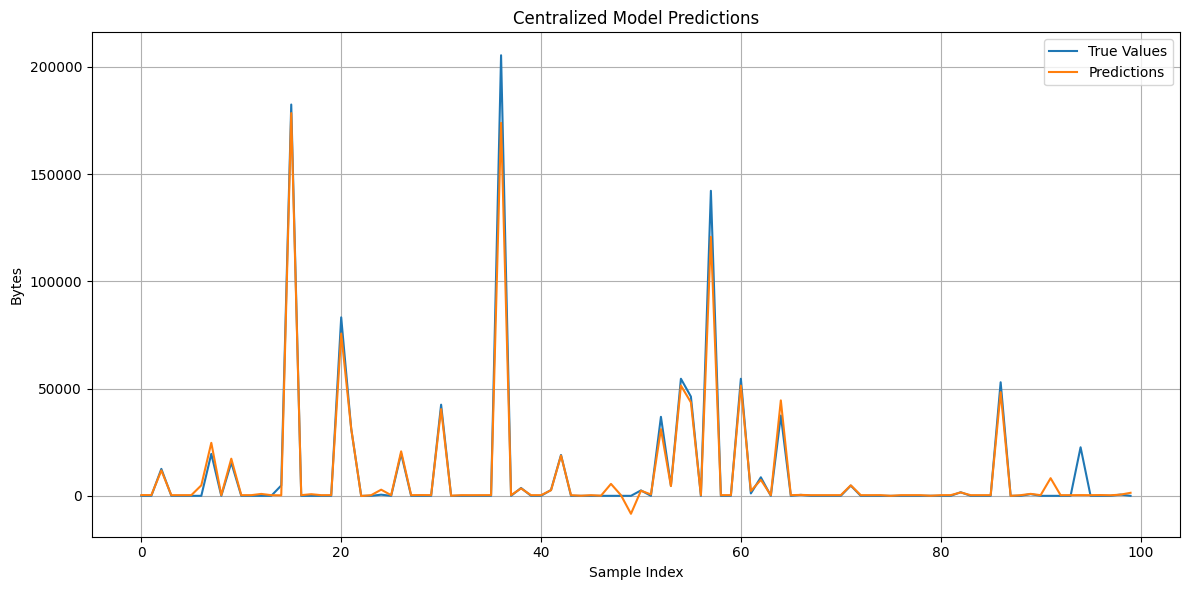

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


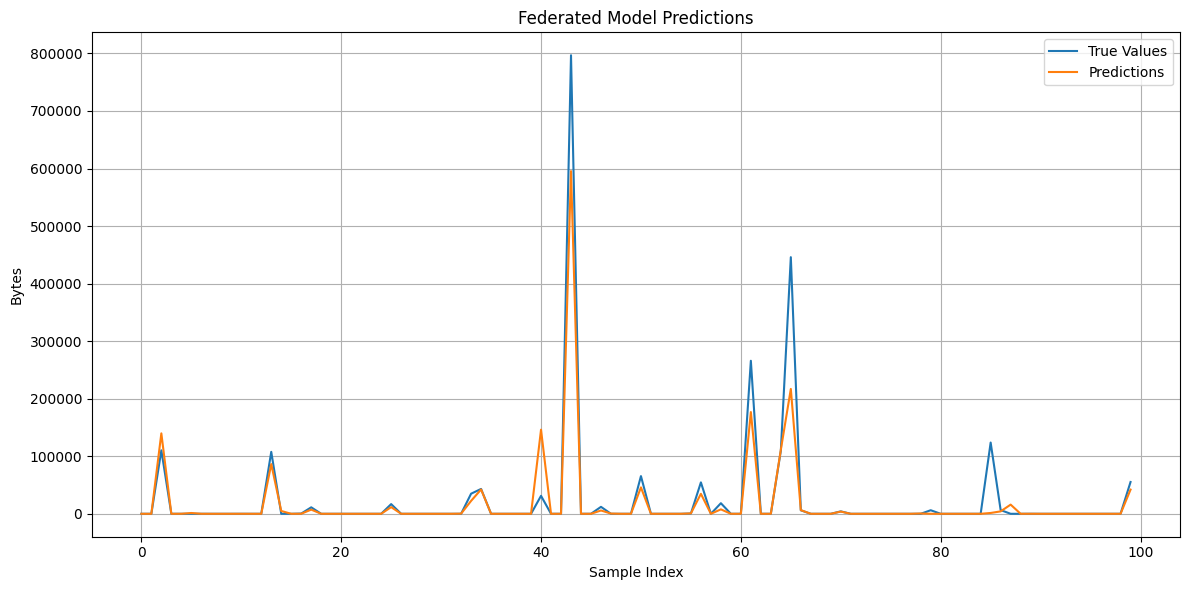

In [ ]:
# (response to exercise 5)
import tensorflow as tf
from tensorflow.keras.models import clone_model
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

import matplotlib.pyplot as plt

# Function to calculate MAPE (handling division by zero)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Handle division by zero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Centralized training function
def train_centralized_model(X_train, y_train, X_val, y_val, epochs=20, batch_size=32):
    print("Training centralized model...")
    model = create_lstm_model()

    # Early stopping to prevent overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=5, restore_best_weights=True
    )

    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=1
    )
    training_time = time.time() - start_time

    return model, history, training_time

# Federated learning functions
def train_local_model(X_train, y_train, X_val, y_val, global_model, epochs=5, batch_size=32):
    # Create a new model with the same architecture but use global weights
    local_model = clone_model(global_model)
    local_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    local_model.set_weights(global_model.get_weights())

    # Train the model with local data
    history = local_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    return local_model, history

def federated_averaging(local_models, sample_weights):
    # Get the weights from the first model as a starting point
    global_weights = [np.zeros_like(w) for w in local_models[0].get_weights()]

    # Weighted average of all local model weights
    for i, model in enumerate(local_models):
        local_weights = model.get_weights()
        for j in range(len(global_weights)):
            global_weights[j] += local_weights[j] * sample_weights[i]

    return global_weights

def train_federated_model(ap_split_data, global_model, num_rounds=5, local_epochs=3, min_samples=50):
    print("Training federated model...")
    start_time = time.time()

    for round_num in range(num_rounds):
        print(f"Round {round_num+1}/{num_rounds}")

        # Train local models for each AP
        local_models = []
        sample_weights = []

        for ap_id, data in ap_split_data.items():
            # Only use APs with sufficient data
            if len(data['train']['X']) > min_samples:
                local_model, _ = train_local_model(
                    data['train']['X'], data['train']['y'],
                    data['val']['X'], data['val']['y'],
                    global_model, epochs=local_epochs
                )
                local_models.append(local_model)
                sample_weights.append(len(data['train']['X']))

        # Normalize weights
        total_samples = sum(sample_weights)
        sample_weights = [w / total_samples for w in sample_weights]

        # Perform federated averaging
        global_weights = federated_averaging(local_models, sample_weights)
        global_model.set_weights(global_weights)

        # Evaluate on combined validation set
        val_loss = global_model.evaluate(
            combined_split_data['val']['X'],
            combined_split_data['val']['y'],
            verbose=0
        )
        print(f"Validation loss: {val_loss[0]:.4f}, MAE: {val_loss[1]:.4f}")

    training_time = time.time() - start_time
    return global_model, training_time

# Evaluate model and calculate metrics
def evaluate_model(model, X_test, y_test, name="Model"):
    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Handle MAPE calculation (avoiding division by zero)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f"\n{name} Performance Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")

    return mse, mae, mape, y_pred

# Train both models
# 1. Centralized model
centralized_model, centralized_history, centralized_time = train_centralized_model(
    combined_split_data['train']['X'],
    combined_split_data['train']['y'],
    combined_split_data['val']['X'],
    combined_split_data['val']['y'],
    epochs=15
)

# 2. Federated model
federated_base_model = create_lstm_model()
federated_model, federated_time = train_federated_model(
    ap_split_data,
    federated_base_model,
    num_rounds=5,
    local_epochs=3
)

# Evaluate both models
centralized_metrics = evaluate_model(
    centralized_model,
    combined_split_data['test']['X'],
    combined_split_data['test']['y'],
    "Centralized Model"
)

federated_metrics = evaluate_model(
    federated_model,
    combined_split_data['test']['X'],
    combined_split_data['test']['y'],
    "Federated Model"
)

# Compare training times
print("\nTraining Times:")
print(f"Centralized Training: {centralized_time:.2f} seconds")
print(f"Federated Training: {federated_time:.2f} seconds")

# Plot sample predictions for visual comparison
def plot_predictions(model, X_test, y_test, title, max_samples=100):
    sample_idx = np.random.choice(len(X_test), min(max_samples, len(X_test)), replace=False)
    X_sample = X_test[sample_idx]
    y_true = y_test[sample_idx]
    y_pred = model.predict(X_sample)

    plt.figure(figsize=(12, 6))
    plt.plot(y_true[:, 0], label='True Values')
    plt.plot(y_pred[:, 0], label='Predictions')
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Bytes')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot predictions for both models
plot_predictions(centralized_model, combined_split_data['test']['X'],
                combined_split_data['test']['y'], "Centralized Model Predictions")
plot_predictions(federated_model, combined_split_data['test']['X'],
                combined_split_data['test']['y'], "Federated Model Predictions")

El modelo centralizado supera al federado en todas las métricas. Además, su entrenamiento tarda menos tiempo. Igualmente, el modelo federado predijo bastante bien y usarlo sería conveniente si se quiere priorizar la privacidad de los datos, por ejemplo.

### Exercise 6 (EXTRA):

Reconsider your design to improve the accuracy of your model. For that, you can find a better approach to split the data (e.g., using larger observation windows) and include additional features.

In [ ]:
# (response to exercise 6)
